In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()
df = pd.read_csv('/mnt/CO2Pred/data/merged_df_2_22_23.csv', usecols = [4, 5, 8, 9, 12, 17, 26, 27, *list(range(132, 146))])
df_all = pd.read_csv('/mnt/CO2Pred/data/merged_df_2_22_23.csv')

In [ ]:
df.head()

In [ ]:
for i,col in enumerate(df.columns):
    print(i, " ", col)

In [ ]:
df.columns

In [ ]:
df["Trait"].unique()

In [ ]:
df["Season"].unique()

In [ ]:
df['Ano'].unique()

In [ ]:
df['Site de recebimento'].unique()

In [ ]:
df.Estado.unique()

In [ ]:
df['Cultura anterior'].unique()

In [ ]:
MPL/Ha Plan
MPL/Ha real
MPL/MPB
MPP/MPL
PA/MPP
PA/MPL
Peso MÃ©dio
MPB ton
MPL ton
MPP ton
PA ton
PA Total Plan
Estimativa PA (scs)
DS/MPL_calc
PA/DS_calc
PA/MPL_calc
SSU/ha_calc
data_plantio_calc
Brand_calc
Environment_calc

In [ ]:
num_list = ["MPL/Ha Plan",
"MPL/Ha real",
"MPL/MPB",
"MPP/MPL",
"PA/MPP",
"PA/MPL",
"Peso Médio",
"MPB ton",
"MPL ton",
"MPP ton",
"PA ton",
"PA Total Plan",
"Estimativa PA (scs)",
"DS/MPL_calc",
"PA/DS_calc",
"PA/MPL_calc",
"SSU/ha_calc",
"data_plantio_calc",
"Brand_calc"]

In [ ]:
n_bins = 100
for column_name in num_list:
    fig, ax = plt.subplots(1,1)
    ax.hist(df_all.loc[:, column_name], bins = n_bins)
    ax.set_title(column_name)    

In [ ]:
df_cft_latam = pd.read_excel('Cool-Farm-Tool-GHG-Inputs LATAM_v2.xlsx', skiprows = 1)

In [ ]:
df_cft_latam["Field Name"].unique().shape

In [ ]:
df_all["Field_Name"].unique().shape

In [ ]:
df_all["Field_Name"] = df_all["Field_Name"].str.replace('_.*', '')

In [ ]:
df_all["Field_Name"]

In [ ]:
df_merge = df_all.merge(df_cft_latam, left_on='Field_Name', right_on='Field Name')

### Merge datasets

In [3]:
df_1 = pd.read_excel('/repos/brazil-sustainability/mnt/Datasets/PC003_consolidated_new (1).xlsx')
df_1['Field_Name'] = df_1['Contrato legal'].str[6:]

In [4]:
df_1[(df_1["Ano"] >= 2020)&(df_1["Ano"]<=2021)].Field_Name.value_counts()

M4V2153     2
M2I2131     2
M7I21127    2
M7I21126    2
M7I2080     2
           ..
M6I20164    1
M2I2041     1
M2I2042     1
M2I2043     1
M2I2149     1
Name: Field_Name, Length: 1226, dtype: int64

In [25]:
df_2 = pd.read_csv('/mnt/CO2Pred/data/br_all_features.csv')
# df_2 = df_2.rename(columns = {'Enter Crop Area (ha)': 'Crop_Area_all_subfields', 'Enter Dry Finished Yield Mass (kg)': 'Dry_Yield_Mass_all_subfields'})

In [26]:
df_1 = df_1.drop_duplicates(subset = ["Field_Name"])
df_1.shape

(5869, 131)

In [27]:
df_2 = df_2.drop_duplicates(subset = ["Field_Name"])

In [28]:
df_2.shape

(474, 28)

In [29]:
df_1 = df_1[df_1['Field_Name'].isin(df_2['Field_Name'])].reset_index(drop = True)
df_1.shape

(474, 131)

In [30]:
df_1 = df_1[["Hy", "Safra", "Ano", "Site de recebimento", "Cultura anterior", "Estado", "Trait", "Field_Name", "Area Plantada Total (ha)"]]

In [31]:
df_2 = df_2.drop(['Unnamed: 0', 'result', 'value', 'unit'], axis = 1)

In [32]:
df_2.columns

Index(['Harvest_Year', 'Field_Name', 'Latitude', 'Longitude', 'Crop_Area_ha',
       'Total_Wet_Mass_Harvested_kg', 'Dry_Finished_Yield_Mass_kg',
       'Soil_Organic_Matter', 'Soil_Drainage', 'Soil_pH', 'Fertilizer_Type',
       'Application_Rate_Unit_kg/ha', 'Application_Method', 'N_as_Urea_%',
       'N_as_Nitrate_%', 'N_as_Ammonium_%', 'P_as_Phosphorus_%', 'P_as_P2O5_%',
       'K_as_Potassium_%', 'K_as_K2O_%', 'Crop_Protection_Application_Doses',
       'Machine', 'Num_Passes', 'Total_Water_Applied_mm'],
      dtype='object')

In [33]:
df_1 = df_1.merge(df_2, how = 'left', on = 'Field_Name')

In [34]:
display(df_1.shape)
display(df_2.shape)

(474, 32)

(474, 24)

In [35]:
df_1.columns

Index(['Hy', 'Safra', 'Ano', 'Site de recebimento', 'Cultura anterior',
       'Estado', 'Trait', 'Field_Name', 'Area Plantada Total (ha)',
       'Harvest_Year', 'Latitude', 'Longitude', 'Crop_Area_ha',
       'Total_Wet_Mass_Harvested_kg', 'Dry_Finished_Yield_Mass_kg',
       'Soil_Organic_Matter', 'Soil_Drainage', 'Soil_pH', 'Fertilizer_Type',
       'Application_Rate_Unit_kg/ha', 'Application_Method', 'N_as_Urea_%',
       'N_as_Nitrate_%', 'N_as_Ammonium_%', 'P_as_Phosphorus_%', 'P_as_P2O5_%',
       'K_as_Potassium_%', 'K_as_K2O_%', 'Crop_Protection_Application_Doses',
       'Machine', 'Num_Passes', 'Total_Water_Applied_mm'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
df_1.head()

,Hy,Safra,Ano,Site de recebimento,Cultura anterior,Estado,Trait,Field_Name,Area Plantada Total (ha),Harvest_Year,Latitude,Longitude,Crop_Area_ha,Total_Wet_Mass_Harvested_kg,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,Application_Method,N_as_Urea_%,N_as_Nitrate_%,N_as_Ammonium_%,P_as_Phosphorus_%,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm
0,DKB335PRO3,WINTER,2020,UDI,NaN,MG,PRO3,M6I2035,60.0,2020,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,5.500000,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0
1,DKB335PRO3,WINTER,2020,UDI,NaN,MG,PRO3,M6I2036,90.0,2020,"S 19Â° 24' 33,10""","W 47Â° 25' 10,90""",180.0,643510.0,418990.0,2.5,good,5.500000,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,18.0,herbicide spraying,15.0,350.0
2,DKB335PRO3,WINTER,2020,UDI,NaN,MG,PRO3,M6I2037,50.0,2020,"S 19Â° 21' 54,70""","W 47Â° 27' 05,60""",100.0,311620.0,305180.0,2.5,good,5.500000,Compose your own NPK,300.0,Incorporate,0.0,20.0,0.0,20.0,0.0,20.0,0.0,13.0,herbicide spraying,15.0,350.0
3,AG8070PRO3,SUMMER,2020,SHG,BATATA,MG,PRO3,M6V2027,38.0,2020,"S 19Â° 19' 07,80""","W 47Â° 22' 36,80""",190.0,926550.0,461330.0,3.0,good,6.258763,Monoammonium phosphate - 11% N / 52% P2O5,110.0,Incorporate,0.0,0.0,11.0,0.0,52.0,0.0,0.0,19.0,herbicide spraying,15.0,450.0
4,AG8690PRO3,SUMMER,2020,UDI,BATATA,MG,PRO3,M6V2067,30.0,2020,"S 19Â° 20' 12,20""","W 47Â° 26' 57,90""",100.0,1005840.0,493570.0,3.0,good,6.492308,Urea - 46% N,220.0,Incorporate,46.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,herbicide spraying,15.0,450.0


In [39]:
cat_columns = [
    "Hy", "Safra", "Site de recebimento", "Fertilizer_Type", "Application_Method", "Machine", "Cultura anterior", "Estado", "Trait", "Soil_Drainage"
]

In [40]:
for col in cat_columns:
    print(df_1[col].value_counts())
    print()

AG8480PRO3     39
DKB230PRO3     30
DKB255PRO3     30
DKB265PRO3     28
AG8700PRO3     26
AS1844PRO3     23
DKB290PRO3     21
AS1666PRO3     19
DKB360PRO3     19
DKB363PRO3     17
AG8780PRO3     17
AG9030PRO3     14
AG9025PRO3     14
DKB335PRO3     13
AS1777PRO3     13
AG8061PRO2     12
AS1820PRO3     11
AS1633PRO3     10
AG8088PRO2     10
AG8070PRO3      9
AS1757PRO3      9
AG7098PRO2      9
DKB177PRO3      8
AS1868PRO3      7
AG7088PRO3      7
AS1633PRO3I     6
3700RR2         6
AG8690PRO3      5
AG1051          5
AG8065PRO3      4
AG9000PRO3      3
AG9050PRO3      3
DKB390PRO2      3
DKB240PRO3      3
3320RR2         3
AG8780PRO       2
3500RR2         2
AS1677PRO3      2
DKB390PRO4      2
AG8700PRO4      2
3110RR2         2
AG8061          1
DKB345PRO3      1
AG7088RR2       1
AG9040          1
2200RR2         1
AS1850PRO3      1
Name: Hy, dtype: int64

WINTER    269
SUMMER    205
Name: Safra, dtype: int64

UDI     146
PTU     121
SHG      55
CVE      54
ITA      44
IPU      42
TCN

In [41]:
df_1 = df_1.drop(["Machine", "Application_Method", "Latitude", "Longitude", "Field_Name", "Ano", "Dry_Finished_Yield_Mass_kg"], axis = 1)

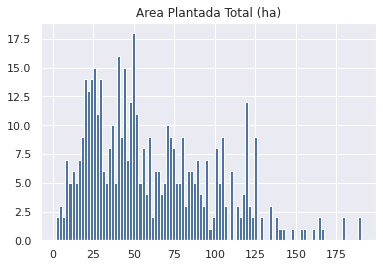

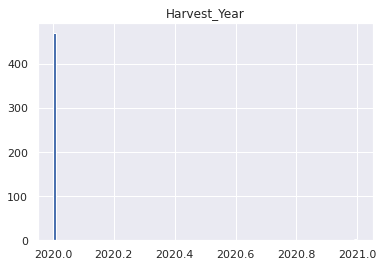

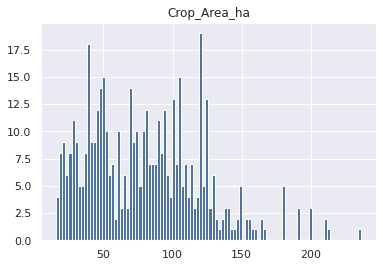

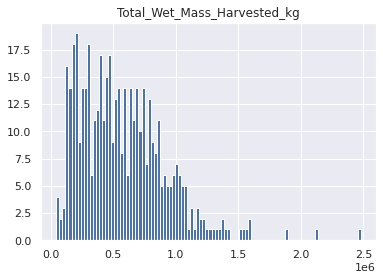

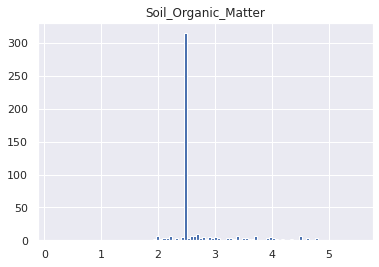

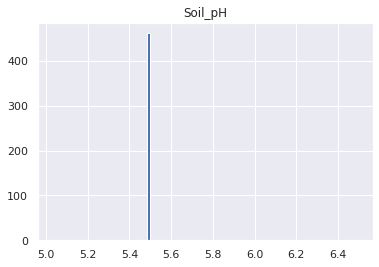

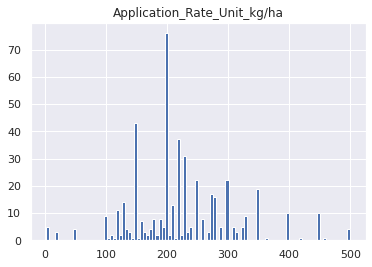

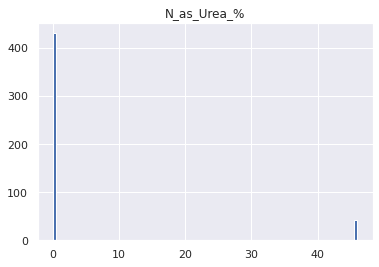

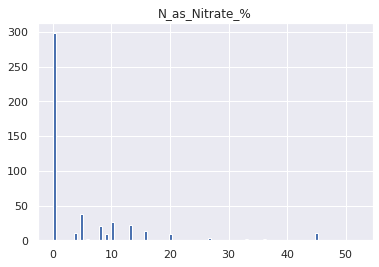

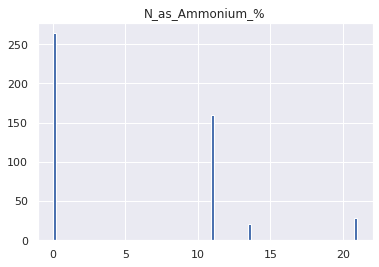

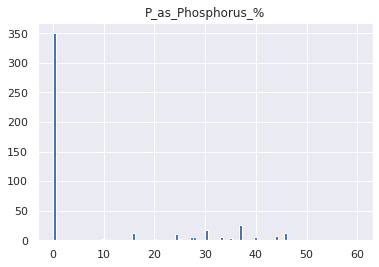

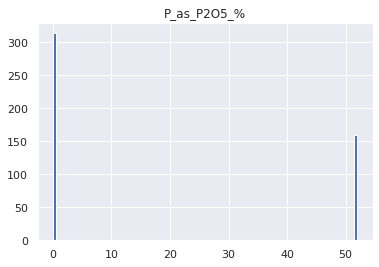

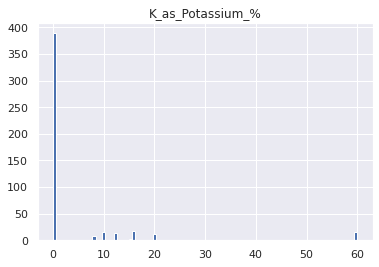

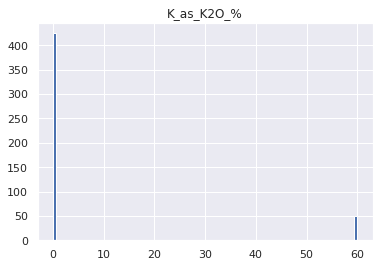

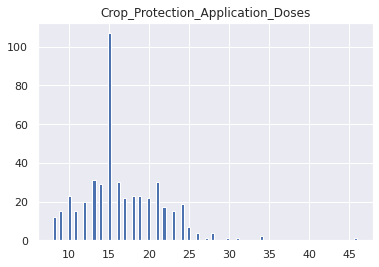

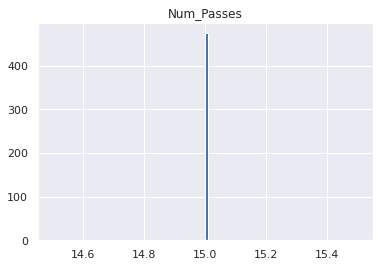

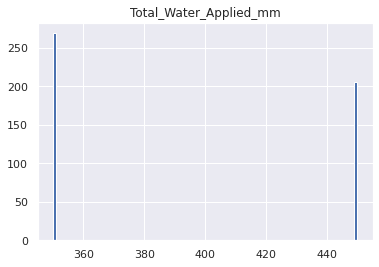

In [42]:
n_bins = 100
for col in df_1.columns:
    if col not in cat_columns:
        fig, ax = plt.subplots(1,1)
        ax.hist(df_1.loc[:, col], bins = n_bins)
        ax.set_title(col)

In [102]:
df_1.columns

Index(['Hy', 'Safra', 'Ano', 'Site de recebimento', 'Cultura anterior',
       'Estado', 'Trait', 'Field_Name', 'Area Plantada Total (ha)',
       'Harvest_Year', 'Crop_Area_ha', 'Total_Wet_Mass_Harvested_kg',
       'Dry_Finished_Yield_Mass_kg', 'Soil_Organic_Matter', 'Soil_Drainage',
       'Soil_pH', 'Fertilizer_Type', 'Application_Rate_Unit_kg/ha',
       'N_as_Urea_%', 'N_as_Nitrate_%', 'N_as_Ammonium_%', 'P_as_Phosphorus_%',
       'P_as_P2O5_%', 'K_as_Potassium_%', 'K_as_K2O_%',
       'Crop_Protection_Application_Doses', 'Num_Passes',
       'Total_Water_Applied_mm'],
      dtype='object')

In [104]:
df_1.drop(['Harvest_Year', 'Ano'], axis = 1, inplace = True)

In [111]:
df_1.columns

Index(['Hy', 'Safra', 'Site de recebimento', 'Cultura anterior', 'Estado',
       'Trait', 'Field_Name', 'Area Plantada Total (ha)', 'Crop_Area_ha',
       'Total_Wet_Mass_Harvested_kg', 'Dry_Finished_Yield_Mass_kg',
       'Soil_Organic_Matter', 'Soil_Drainage', 'Soil_pH', 'Fertilizer_Type',
       'Application_Rate_Unit_kg/ha', 'N_as_Urea_%', 'N_as_Nitrate_%',
       'N_as_Ammonium_%', 'P_as_Phosphorus_%', 'P_as_P2O5_%',
       'K_as_Potassium_%', 'K_as_K2O_%', 'Crop_Protection_Application_Doses',
       'Num_Passes', 'Total_Water_Applied_mm'],
      dtype='object')

In [112]:
cat_columns = [
    "Hy", "Safra", "Site de recebimento", "Fertilizer_Type", "Cultura anterior", "Estado", "Trait", "Soil_Drainage"
]

df_1e = df_1.copy()

for col in cat_columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_1[col])
    df_1e[col] = encoded

In [113]:
df_1e

,Hy,Safra,Site de recebimento,Cultura anterior,Estado,Trait,Field_Name,Area Plantada Total (ha),Crop_Area_ha,Total_Wet_Mass_Harvested_kg,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,N_as_Urea_%,N_as_Nitrate_%,N_as_Ammonium_%,P_as_Phosphorus_%,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Num_Passes,Total_Water_Applied_mm
0,41,1,6,14,2,3,M6I2035,60.0,60.0,182960.0,180200.0,2.500000,0,5.500000,2,300.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,15.0,350.0
1,41,1,6,14,2,3,M6I2036,90.0,180.0,643510.0,418990.0,2.500000,0,5.500000,2,300.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,18.0,15.0,350.0
2,41,1,6,14,2,3,M6I2037,50.0,100.0,311620.0,305180.0,2.500000,0,5.500000,2,300.0,0.0,20.0,0.0,20.0,0.0,20.0,0.0,13.0,15.0,350.0
3,12,0,4,4,2,3,M6V2027,38.0,190.0,926550.0,461330.0,3.000000,0,6.258763,3,110.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,19.0,15.0,450.0
4,15,0,6,4,2,3,M6V2067,30.0,100.0,1005840.0,493570.0,3.000000,0,6.492308,5,220.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,15.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,5,1,4,14,1,0,M6I20179,45.0,45.0,434130.0,246630.0,2.500000,0,5.500000,2,400.0,0.0,4.0,0.0,30.0,0.0,10.0,0.0,9.0,15.0,350.0
470,41,1,2,0,2,3,M6I2130,45.0,45.0,213050.0,121500.0,2.500000,0,5.500000,3,220.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,12.0,15.0,350.0
471,41,1,1,11,2,3,M6I2172,40.0,40.0,189370.0,108000.0,2.720000,0,5.500000,3,220.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,12.0,15.0,350.0
472,31,1,6,11,2,3,M7I21131,44.5,44.5,308020.0,160200.0,3.950562,0,5.500000,3,155.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,20.0,15.0,350.0


In [114]:
df_1e.drop(columns = ['Field_Name'], inplace = True, axis = 1)

### Tensorflow modeling

In [120]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
tf.keras.backend.set_floatx('float64')

np.set_printoptions(precision=3, suppress=True)

2.4.1


In [115]:
train_dataset = df_1e.sample(frac=0.8, random_state=0)
test_dataset = df_1e.drop(train_dataset.index)

In [116]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Total_Wet_Mass_Harvested_kg')
test_labels = test_features.pop('Total_Wet_Mass_Harvested_kg')

In [121]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis = -1)

normalizer.adapt(np.array(train_features))

In [128]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(24, activation='tanh'),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='tanh'),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='tanh'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [129]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 24)                49        
_________________________________________________________________
dense_6 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [130]:
def plot_loss(history):
    plt.semilogy(history.history['loss'], label='loss')
    plt.semilogy(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.01])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Total_Wet_Mass_Harvested_kg]')
    plt.legend()
    plt.grid(True)

In [131]:
# %%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000)

/tmp/ipykernel_634/3527425194.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 0.01])


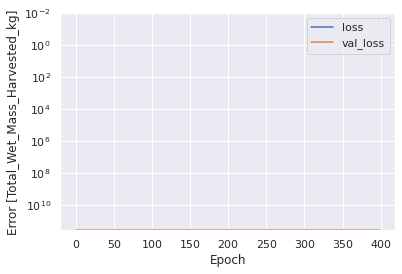

In [132]:
plot_loss(history)

In [133]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
395,4.604490e+11,3.987226e+11,395
396,4.604487e+11,3.987223e+11,396
397,4.604485e+11,3.987221e+11,397
398,4.604482e+11,3.987218e+11,398
399,4.604479e+11,3.987215e+11,399


In [134]:
train_features

,Hy,Safra,Site de recebimento,Cultura anterior,Estado,Trait,Area Plantada Total (ha),Crop_Area_ha,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,N_as_Urea_%,N_as_Nitrate_%,N_as_Ammonium_%,P_as_Phosphorus_%,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Num_Passes,Total_Water_Applied_mm
75,19,1,6,14,2,3,25.5,85.0,309980.0,2.500,0,5.5,3,230.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,15.0,15.0,350.0
90,21,0,3,14,2,3,22.0,22.0,75400.0,2.500,0,5.5,5,130.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,15.0,450.0
250,36,0,1,12,4,3,70.0,140.0,569600.0,2.476,0,5.5,4,150.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,15.0,450.0
206,14,0,0,14,3,3,84.0,84.0,332750.0,2.500,0,5.5,5,120.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,15.0,450.0
435,16,1,3,14,1,3,105.0,105.0,362440.0,2.500,0,5.5,2,280.0,0.0,8.0,0.0,40.0,0.0,0.0,0.0,16.0,15.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,38,1,6,14,1,3,32.0,40.0,155040.0,2.500,0,5.5,3,350.0,0.0,0.0,11.0,0.0,52.0,0.0,0.0,18.0,15.0,350.0
207,6,0,6,4,2,3,45.0,45.0,277920.0,3.405,0,5.5,1,275.0,0.0,13.5,13.5,0.0,0.0,0.0,0.0,11.0,15.0,450.0
279,14,0,3,8,2,3,20.0,40.0,199480.0,2.660,0,5.5,2,450.0,0.0,8.0,0.0,28.0,0.0,16.0,0.0,12.0,15.0,450.0
227,30,1,0,14,3,3,105.0,210.0,915260.0,2.500,0,5.5,2,300.0,0.0,20.0,0.0,0.0,0.0,20.0,0.0,20.0,15.0,350.0


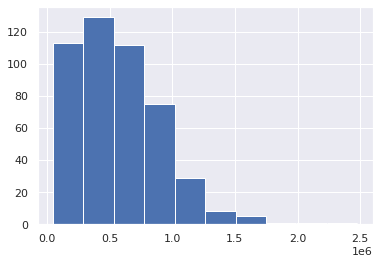

In [16]:
sns.set_theme()
plt.hist(df_1["Total_Wet_Mass_Harvested_kg"])
plt.show()

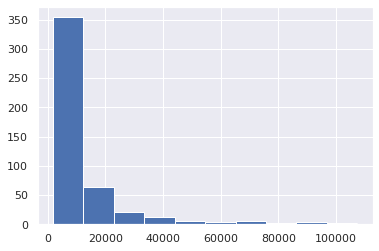

In [18]:
plt.hist(df_1["Total_Wet_Mass_Harvested_kg"] / df_1["Area Plantada Total (ha)"])
plt.show()